In [2]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
transaction_data = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-b-dzhumaeva-37/project_5_python/transaction_data.csv')

In [4]:
transaction_data.head()

,date,name,transaction
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled
1,2020-03-02 00:59:09,Irina_Fedorova,successfull
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled


#### 1. Проверим размер таблицы, типы переменных, число пропущенных значений и описательную статистику

In [5]:
transaction_data.shape

(5315, 3)

In [6]:
transaction_data.dtypes

date           object
name           object
transaction    object
dtype: object

In [7]:
transaction_data.date= pd.to_datetime(transaction_data.date)

In [8]:
transaction_data.isna().sum()

date           0
name           0
transaction    0
dtype: int64

In [9]:
transaction_data.describe()

,date,name,transaction
count,5315,5315,5315
unique,3373,56,3
top,2020-03-02 00:35:03,Masha_Ozerova,successfull
freq,6,112,3692
first,2020-03-02 00:00:00,NaN,NaN
last,2020-03-02 01:29:05,NaN,NaN


#### 2. Какие значения находятся в колонке transaction? Сколько наблюдений относятся к тому или иному уровню? 

In [14]:
transaction_data.transaction.unique()

array(['cancelled', 'successfull', 'error'], dtype=object)

In [12]:
df = transaction_data.transaction.value_counts()
df

successfull    3692
cancelled      1619
error             4
Name: transaction, dtype: int64

#### Визуализируем результат с помощью барплота

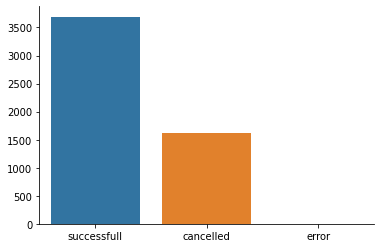

In [17]:
sns.barplot(x=df.index, y=df.values)
sns.despine()

В графике плохо видно число наблюдений у некоторых значений.\
Улучшим график.

In [14]:
import matplotlib.pyplot as plt

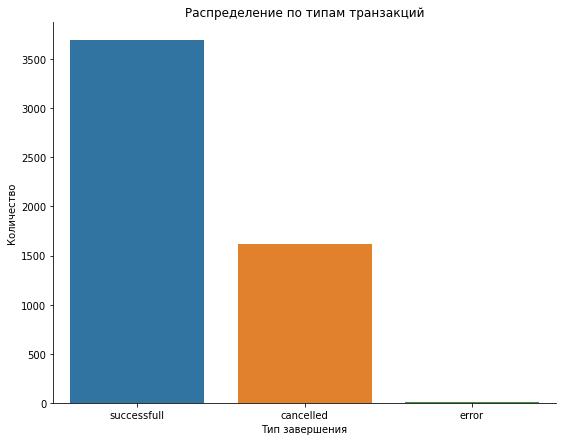

In [26]:
fig, ax = plt.subplots(figsize=(9,7))
sns.barplot(x=df.index, y=df.values, ax=ax)
ax.set_ylabel('Количество')
ax.set_xlabel('Тип завершения')
ax.set_title('Распределение по типам транзакций')
sns.despine()

В моей версии matplotlib не последней версии. Если с использованием последней версии добавить "ax.bar_label(ax.containers[0])", то график заполнится числовыми значениями.

#### 3. Сколько транзакций завершились ошибкой?

In [27]:
df['error']

4

#### 4. Сколько успешных транзакций осуществил каждый из пользователей? Построим гистограмму распределения числа успешных транзакций.

In [28]:
df2 = transaction_data.query("transaction == 'successfull'")\
    .groupby('name', as_index= False)\
    .agg({'transaction':'count'})

In [31]:
df2.describe()

,transaction
count,56.000000
mean,65.928571
std,7.787769
min,46.000000
25%,61.000000
50%,64.000000
75%,72.000000
max,82.000000


In [30]:
df2.quantile(q=0.25) #25% совершили менее 61 транзакций

transaction    61.0
Name: 0.25, dtype: float64

In [32]:
df2.transaction.median()

64.0

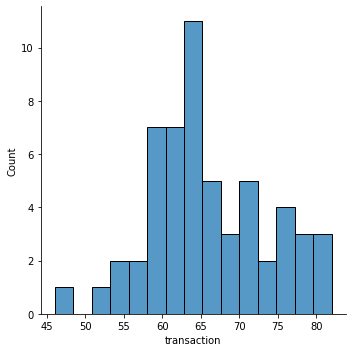

In [37]:
sns.displot(df2.transaction, bins=15)
sns.despine()

Таким образом:
* Пользователи в среднем совершили примерно по 66 транзакций
* Максимальное число транзакций – 82
* Примерно 25% пользователей совершили менее 61 транзакции

#### 6. Коллега прислал обновленные данные. Построим сводную таблицу user_vs_minute_pivot, где в качестве столбцов будут использованы имена пользователей, строк – минуты, значений – число совершенных операций в указанную минуту. Пропущенные значения заполним нулями.

In [38]:
df3 = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-b-dzhumaeva-37/project_5_python/transaction_data_updated.csv')

In [39]:
user_vs_minute_pivot = df3.groupby(['name','minute'], as_index=False)\
    .agg({'transaction': 'count'})\
    .pivot(index = 'minute', columns = 'name', values='transaction').fillna(0)

In [40]:
user_vs_minute_pivot.head()

name,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,Irina_Lesnova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
minute,,,,,,,,,,,,,,,,,,,,,
0,3.0,4.0,2.0,3.0,4.0,4.0,2.0,1.0,2.0,2.0,...,0.0,3.0,1.0,1.0,4.0,1.0,3.0,0.0,0.0,1.0
1,4.0,4.0,0.0,4.0,2.0,5.0,4.0,4.0,4.0,3.0,...,4.0,5.0,3.0,2.0,3.0,3.0,0.0,0.0,3.0,2.0
2,1.0,2.0,4.0,4.0,2.0,1.0,3.0,2.0,3.0,3.0,...,4.0,1.0,3.0,3.0,0.0,1.0,2.0,1.0,3.0,1.0
3,3.0,0.0,2.0,0.0,5.0,2.0,1.0,3.0,2.0,2.0,...,1.0,5.0,5.0,2.0,4.0,0.0,3.0,4.0,1.0,0.0
4,3.0,0.0,0.0,3.0,1.0,1.0,2.0,3.0,2.0,1.0,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,3.0,0.0,1.0


#### 6. Разбираемся,  есть ли в данных ошибка, или же всё хорошо.

In [43]:
minute_trans = user_vs_minute_pivot.sum(axis=1)
minute_trans.head()

minute
0    111.0
1    145.0
2    123.0
3    129.0
4     92.0
dtype: float64

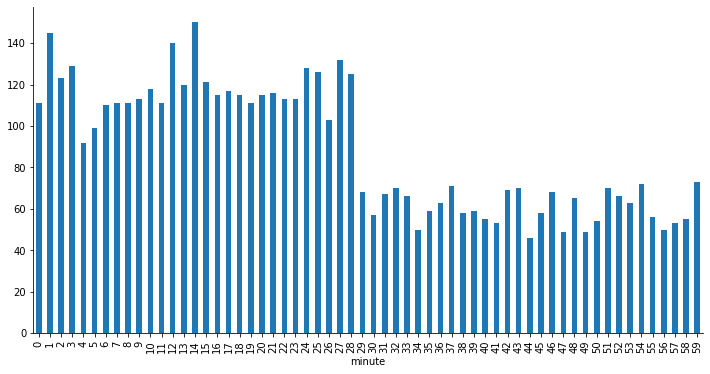

In [44]:
minute_trans.plot.bar(figsize=(12, 6))
sns.despine()

Извлекли минутную часть времени, а не число минут с начала дня, поэтому ошибка!

#### 7. Исправляем ошибку и сохраняем правильное число минут, прошедших с начала дня, в колонку true_minute.

In [48]:
transaction_data['true_minute'] = transaction_data.date.dt.minute + transaction_data.date.dt.hour * 60
transaction_data.head()

,date,name,transaction,true_minute
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled,37
1,2020-03-02 00:59:09,Irina_Fedorova,successfull,59
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull,66
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled,2
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled,17


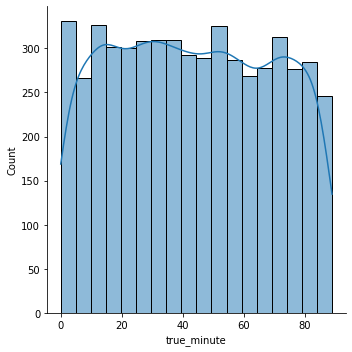

In [49]:
sns.displot(data=transaction_data, x='true_minute', kde=True)
sns.despine()